In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt




In [2]:

def calculate_obv(data):
# The sign of the day-over-day change in closing price
    # np.sign will return +1 for a positive change, -1 for a negative change, and 0 for no change.
    price_change_direction = np.sign(data['Close'].diff())
    
    # Multiply the direction by the volume
    directional_volume = price_change_direction * data['Volume']
    
    # The OBV is the cumulative sum of the directional volume
    obv = directional_volume.cumsum()
    
    return obv



In [11]:
# --- 1. Data Fetching ---
# Fetch historical data for NVIDIA (NVDA) for the last two years
nvda_data = yf.download('NVDA', start='2025-07-01', end='2025-07-30')


/var/folders/3n/c2cyvjmd52585bcd83mjw9dw0000gp/T/ipykernel_40111/3126686308.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nvda_data = yf.download('NVDA', start='2025-07-01', end='2025-07-30')
[*********************100%***********************]  1 of 1 completed


In [12]:

# --- 2. OBV Calculation ---
# Calculate OBV and add it as a new column to the DataFrame
nvda_data['OBV'] = calculate_obv(nvda_data)



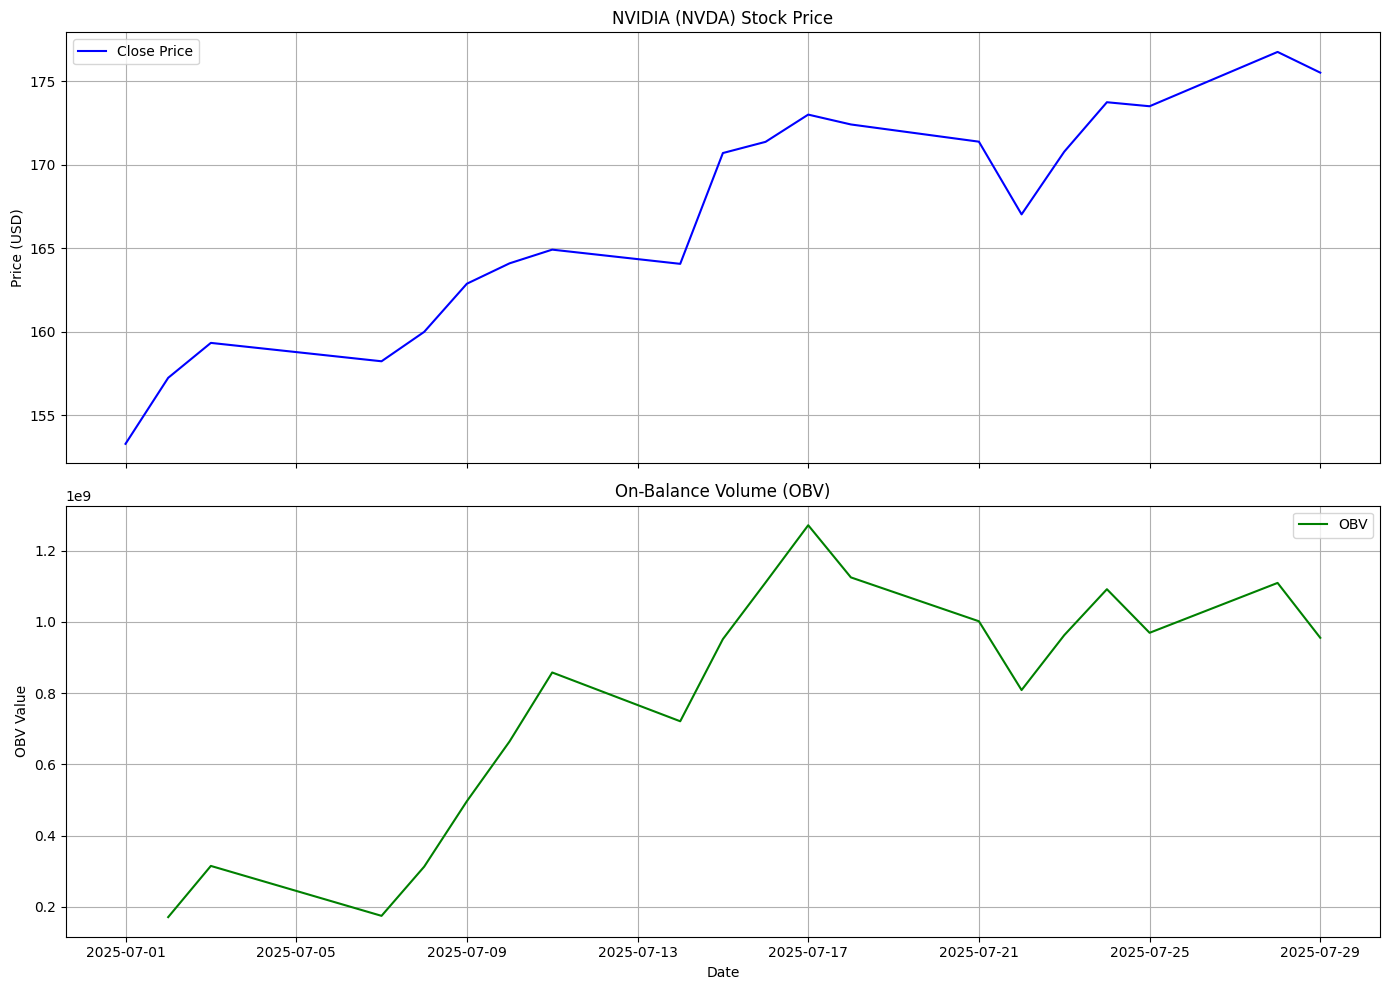

Price            Close        High         Low        Open     Volume  \
Ticker            NVDA        NVDA        NVDA        NVDA       NVDA   
Date                                                                    
2025-07-23  170.779999  171.259995  167.970001  169.529999  154082200   
2025-07-24  173.740005  173.830002  171.300003  172.440002  128984600   
2025-07-25  173.500000  174.720001  172.960007  173.610001  122316800   
2025-07-28  176.750000  177.000000  173.970001  174.020004  140023500   
2025-07-29  175.509995  179.380005  175.020004  177.960007  154077500   

Price                OBV  
Ticker                    
Date                      
2025-07-23  9.626376e+08  
2025-07-24  1.091622e+09  
2025-07-25  9.693054e+08  
2025-07-28  1.109329e+09  
2025-07-29  9.552514e+08  


In [13]:

# --- 3. Visualization ---
# Create a figure with two subplots, sharing the x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot 1: Closing Price
ax1.plot(nvda_data.index, nvda_data['Close'], label='Close Price', color='blue')
ax1.set_title('NVIDIA (NVDA) Stock Price')
ax1.set_ylabel('Price (USD)')
ax1.legend()
ax1.grid(True)

# Plot 2: On-Balance Volume (OBV)
ax2.plot(nvda_data.index, nvda_data['OBV'], label='OBV', color='green')
ax2.set_title('On-Balance Volume (OBV)')
ax2.set_ylabel('OBV Value')
ax2.set_xlabel('Date')
ax2.legend()
ax2.grid(True)

# Display the plots
plt.tight_layout()
plt.show()

# Display the last few rows of the DataFrame to check the data
print(nvda_data.tail())
